# **LOAD DATA**

As done in previous attempt

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import itertools
import numpy as np
import os
import shutil
import random
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/flowers/archive.zip', 'r') # Opens the zip file in read mode
zip_ref.extractall('/tmp/dataset')
zip_ref.close()

In [4]:
print('all daisy images: ', len(os.listdir('/tmp/dataset/flowers/daisy')))
print('all dandelion images: ', len(os.listdir('/tmp/dataset/flowers/dandelion')))
print('all rose images: ', len(os.listdir('/tmp/dataset/flowers/rose')))
print('all sunflower images: ', len(os.listdir('/tmp/dataset/flowers/sunflower')))
print('all tuplip images: ', len(os.listdir('/tmp/dataset/flowers/tulip')))

all daisy images:  764
all dandelion images:  1052
all rose images:  784
all sunflower images:  733
all tuplip images:  984


In [5]:
folder_names = [ 'daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
dataset_direct='/tmp/dataset/flowers/'
dataset_direct_train = dataset_direct + 'train/'
dataset_direct_valid = dataset_direct + 'valid/'
dataset_direct_test = dataset_direct + 'test/'

In [6]:
import os, shutil
def clear_directory(folder):
#folder = '/tmp/dataset/flowers/train/tulip'
  for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [7]:
if os.path.exists(dataset_direct_train):
  for name in folder_names:
    clear_directory(dataset_direct_train+name)
  for name in folder_names:
    os.rmdir(dataset_direct_train+name)

  os.rmdir(dataset_direct+'train')

if os.path.exists(dataset_direct_valid):
  for name in folder_names:
    clear_directory(dataset_direct_valid+name)
  for name in folder_names:
    os.rmdir(dataset_direct_valid+name)
  os.rmdir(dataset_direct+'valid')

if os.path.exists(dataset_direct_test):
  for name in folder_names:
    clear_directory(dataset_direct_test+name)
  for name in folder_names:
    os.rmdir(dataset_direct_test+name)
  os.rmdir(dataset_direct+'test')




In [8]:
os.chdir('/tmp/dataset/flowers')
if os.path.isdir('train/daisy') is False:
  os.makedirs('train/daisy')
  os.makedirs('train/dandelion')
  os.makedirs('train/rose')
  os.makedirs('train/sunflower')
  os.makedirs('train/tulip')
  
  os.makedirs('valid/daisy')
  os.makedirs('valid/dandelion')
  os.makedirs('valid/rose')
  os.makedirs('valid/sunflower')
  os.makedirs('valid/tulip')

  os.makedirs('test/daisy')
  os.makedirs('test/dandelion')
  os.makedirs('test/rose')
  os.makedirs('test/sunflower')
  os.makedirs('test/tulip')



In [9]:
folder_names[:5]

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [10]:
for flower_type in folder_names[:5]:
  img_list = os.listdir('/tmp/dataset/flowers/'+flower_type)
  for img in random.sample(img_list, round(len(os.listdir('/tmp/dataset/flowers/'+flower_type))*0.7)):
    shutil.move(dataset_direct+flower_type+'/'+img, '/tmp/dataset/flowers/train/'+flower_type)
  img_list = os.listdir('/tmp/dataset/flowers/'+flower_type)
  for img in random.sample(img_list, round(len(os.listdir('/tmp/dataset/flowers/'+flower_type))*0.66666)):
    shutil.move(dataset_direct+flower_type+'/'+img, '/tmp/dataset/flowers/valid/'+flower_type)
  
  source_dir = '/tmp/dataset/flowers/'+flower_type +'/'
  target_dir = '/tmp/dataset/flowers/test/'+flower_type +'/'
  file_names = os.listdir(source_dir)

  for file_name in file_names:
    shutil.move(source_dir+file_name, target_dir)

In [11]:
print('train daisy images: ', len(os.listdir('/tmp/dataset/flowers/train/daisy')))
print('valid daisy images: ', len(os.listdir('/tmp/dataset/flowers/valid/daisy')))
print('test daisy images: ', len(os.listdir('/tmp/dataset/flowers/test/daisy')))

train daisy images:  535
valid daisy images:  153
test daisy images:  76


In [12]:
images = random.sample(os.listdir('/tmp/dataset/flowers/valid/rose'),20)

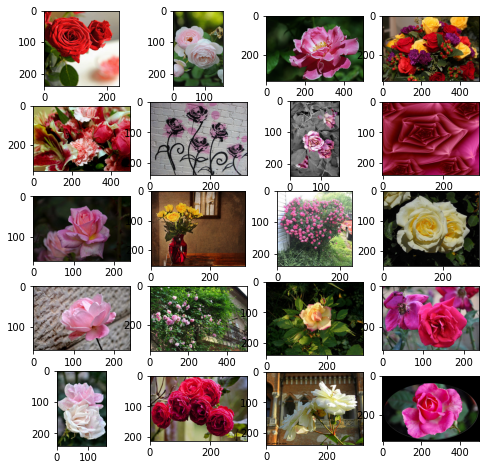

In [13]:
import cv2
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(0, columns*rows ):
    IMG = cv2.imread('/tmp/dataset/flowers/valid/rose/'+images[i])
    RGB_img = cv2.cvtColor(IMG, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(RGB_img)
plt.show()

# **Images Preperation - Preprocessed Data**

In [14]:
batch_size = 8
num_of_epochs = 30

In [15]:
train_prep = ImageDataGenerator(rescale=1/255)
valid_prep = ImageDataGenerator(rescale=1/255)
test_prep = ImageDataGenerator(rescale=1/255)

In [16]:
train_dataset = train_prep.flow_from_directory(
    dataset_direct_train,
    target_size=(320,240),
    batch_size=batch_size,
    class_mode='sparse'
)

valid_dataset = valid_prep.flow_from_directory(
    dataset_direct_valid,
    target_size=(320,240),
    batch_size=batch_size,
    class_mode='sparse'
)

test_prep = ImageDataGenerator(rescale=1/255)

test_dataset = test_prep.flow_from_directory(
    dataset_direct_test,
    target_size=(320,240),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 3022 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 430 images belonging to 5 classes.


In [17]:
train_dataset.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [18]:
train_dataset.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

# **Show Preprocessed Data**

In [19]:
imgs, labels = next(train_dataset)

In [20]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed 
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

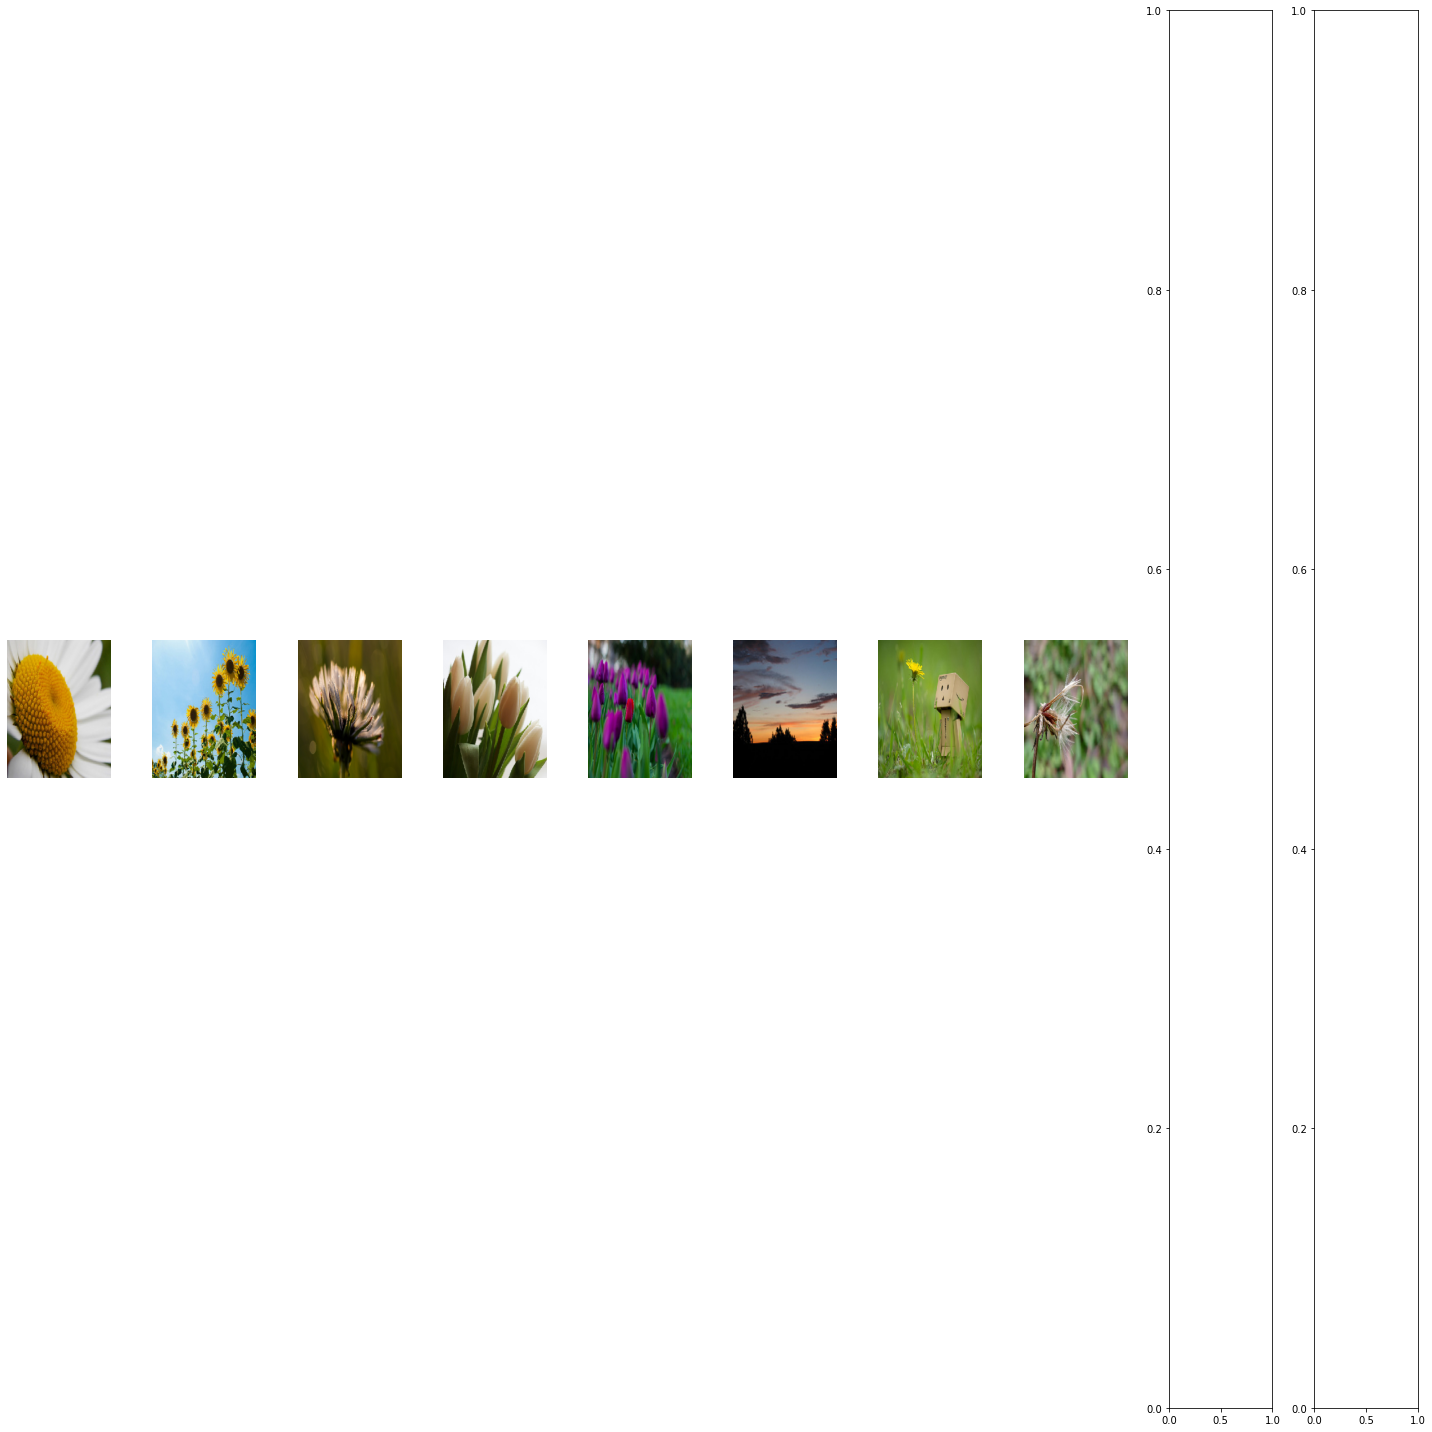

[0. 3. 1. 4. 4. 3. 1. 1.]


In [21]:
plotImages(imgs)
print(labels)

# **Confusion Matrix - function**

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix
  Normalization can be applied by setting 'normalization=True'
  """
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title),
  plt.colorbar(),
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('COnfusion matrix, without normalization')

  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

# **CNN Model 4**

This time we will change number of filters in all layers - we'll doubble the, and add Early Stop feature - which will stop training if in few last epochs the accuracy won't increase

In [23]:
model_cnn_4 = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(320,240,3)),
    layers.MaxPool2D(2,2),
    #
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    #
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    #
    layers.Flatten(),
    ##
    layers.Dense(256, activation='relu'),
    ##
    layers.Dense(32, activation='relu'),
    ##
    layers.Dense(5,activation='softmax')
])

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

model_cnn_4.compile(loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

EarlyStop = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

In [25]:
history_cnn_4 = model_cnn_4.fit(train_dataset,
                                epochs=num_of_epochs,
                                validation_data=valid_dataset,
                                callbacks=[EarlyStop])

Epoch 1/30
378/378 [==============================] - 57s 70ms/step - loss: 1.3866 - accuracy: 0.4126 - val_loss: 1.2396 - val_accuracy: 0.5098
Epoch 2/30
378/378 [==============================] - 26s 68ms/step - loss: 1.0942 - accuracy: 0.5529 - val_loss: 1.0849 - val_accuracy: 0.5468
Epoch 3/30
378/378 [==============================] - 25s 67ms/step - loss: 0.8814 - accuracy: 0.6638 - val_loss: 1.0159 - val_accuracy: 0.6069
Epoch 4/30
378/378 [==============================] - 26s 68ms/step - loss: 0.5539 - accuracy: 0.7942 - val_loss: 1.2956 - val_accuracy: 0.6023
Epoch 5/30
378/378 [==============================] - 26s 68ms/step - loss: 0.2472 - accuracy: 0.9093 - val_loss: 2.2171 - val_accuracy: 0.5607
Epoch 6/30
378/378 [==============================] - 26s 67ms/step - loss: 0.1637 - accuracy: 0.9530 - val_loss: 2.6633 - val_accuracy: 0.5815
Epoch 7/30
378/378 [==============================] - 26s 68ms/step - loss: 0.0650 - accuracy: 0.9825 - val_loss: 2.8185 - val_accuracy:

# **Predict Model 4**

In [26]:
predictions_cnn_4 = model_cnn_4.predict(x=test_dataset)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_dataset.classes, y_pred=np.argmax(predictions_cnn_4 , axis=-1))

COnfusion matrix, without normalization
[[53 10  7  1  5]
 [30 55  5 12  3]
 [13  0 48  1 16]
 [ 8  6  3 43 13]
 [10  6 35  0 47]]


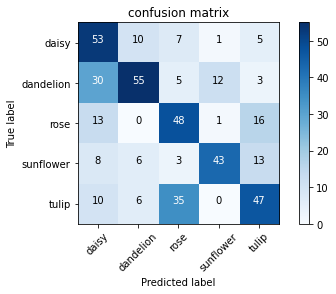

In [28]:
cm_plot_labels = folder_names
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion matrix')